In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\Downloads\Churn_Modelling.csv")
pd.options.display.max_rows= 10000
df.head(10)
#df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [2]:
df.drop_duplicates(['Surname', 'CustomerId'])
df.info()                  #This is to drop duplicate files by ID(if any). lucky for us there's none

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df["Surname"]=df["Surname"].replace("[^a-zA-Z]","",regex=True)
df["CustomerId"]=df["CustomerId"].replace("[^0-9]","",regex=True)   #cleaning all unwanted characters

# print(gp)     


In [5]:
grp1 = df['IsActiveMember'] == (1)    #here we loop through the list to find active
grp0 = df['IsActiveMember'] == (0)    # and inactive members

print("NONE ACTIVE MEMBERS")
# grp0.sum()
# grp0
grp0.sum()                #this is the sum of all inactive members

NONE ACTIVE MEMBERS


4849

In [6]:
print("ACTIVE MEMBERS")
grp1.sum()                         #this is the sum of all active members
           #clearly we see that the number of active members is just a lil greater than that of inactive members

ACTIVE MEMBERS


5151

([<matplotlib.axis.XTick at 0x155eb671ed0>,
 [Text(0, 0, 'Inactive 4849'), Text(1, 0, 'Active 5151')])

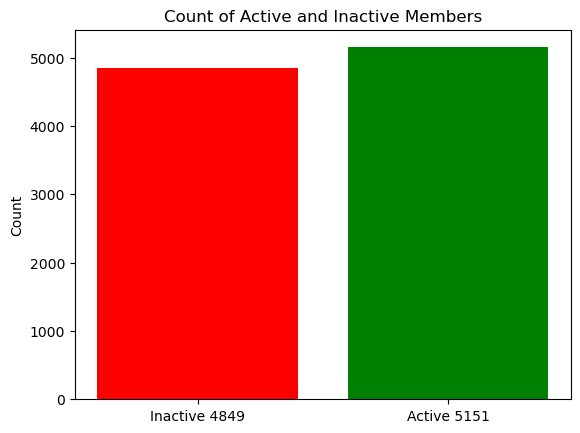

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

num_members = df['IsActiveMember'].value_counts()

plt.bar(num_members.index, num_members.values, color=['green', 'red'])
plt.ylabel('Count')
plt.title('Count of Active and Inactive Members')
plt.xticks([0, 1], ['Inactive 4849', 'Active 5151'])  #we vaisualize the number of active members to inactive members

In [8]:
df['Geography'].describe()   #we find how many countries there are in the dataframe 

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

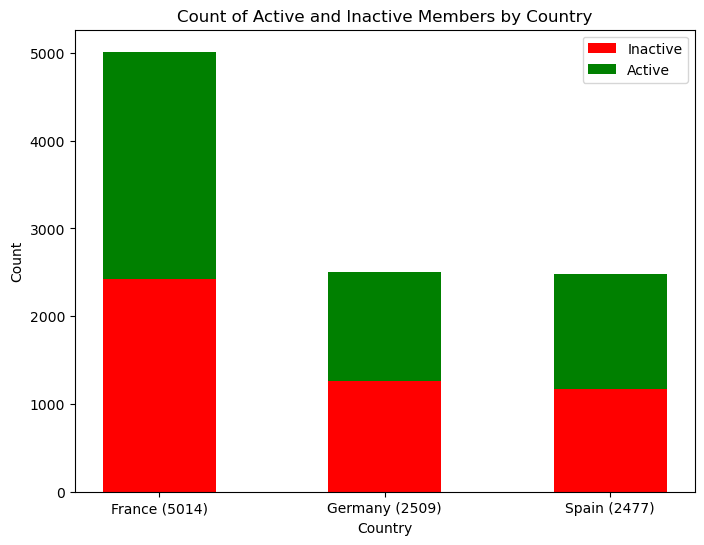

In [13]:
# Count active and inactive members per country
grouped_df = df.groupby(['Geography', 'IsActiveMember']).size().unstack(fill_value=0)

# Rename columns for clarity
grouped_df.columns = ['Inactive', 'Active']

bar_width = 0.5
bar_positions = np.arange(len(grouped_df))

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot stacked bars
ax.bar(bar_positions, grouped_df['Inactive'], bar_width, label='Inactive', color='red')
ax.bar(bar_positions, grouped_df['Active'], bar_width, bottom=grouped_df['Inactive'], label='Active', color='green')

# Add labels and title         2509
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Count of Active and Inactive Members by Country')
ax.set_xticks(bar_positions)            #plt.xticks([0, 1], ['Inactive 4849', 'Active 5151'])
ax.set_xticklabels(['France (5014)','Germany (2509)', 'Spain (2477)'])
ax.legend()          #we plot a graph to display countries by active and inactive members
                    #and clearly we can see that france has the highest population  (5014)
# Show the plot     #From this graph we also realize that the ratio of active users to inactive users for each country doesn't varry much aprox.the same
                    ###This is to say that comparison by active to inactive members is nearly the same amongst countries
plt.show()          

In [14]:
frans_cus = df[df['Geography'] == 'France']
                                              #so we go ahead to check how members are active from france  = 2591
activ_frans = frans_cus.sum()

frans = frans_cus[frans_cus['IsActiveMember']==0].count()  #here we also write a code to output inactive members from france = 2423

activ_frans

RowNumber                                                   25196496
CustomerId                                               78672919670
Surname            HargraveOnioBoniBartlettHeHBearceKayChinHaoMcD...
CreditScore                                                  3257437
Geography          FranceFranceFranceFranceFranceFranceFranceFran...
Gender             FemaleFemaleFemaleMaleMaleMaleMaleFemaleFemale...
Age                                                           193098
Tenure                                                         25093
Balance                                                 311332479.49
NumOfProducts                                                   7676
HasCrCard                                                       3543
IsActiveMember                                                  2591
EstimatedSalary                                          500894492.6
Exited                                                           810
dtype: object

In [15]:
germ_cus = df[df['Geography'] == 'Germany']                #we do the same for germany and their active members = 1248

germ = germ_cus[germ_cus['IsActiveMember']==0].count()  #here we also write a code to output inactive members from france = 1261

germ_cus.sum()

RowNumber                                                   12545700
CustomerId                                               39367604133
Surname            ObinnaGoforthRomeoYoungMcWilliamsSandersonCame...
CreditScore                                                  1634497
Geography          GermanyGermanyGermanyGermanyGermanyGermanyGerm...
Gender             FemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFe...
Age                                                            99787
Tenure                                                         12570
Balance                                                 300402861.38
NumOfProducts                                                   3813
HasCrCard                                                       1791
IsActiveMember                                                  1248
EstimatedSalary                                         253693608.67
Exited                                                           814
dtype: object

In [17]:
spain_cus = df[df['Geography'] == 'Spain']  # and the same for Spain, their active members = 1312

spain = spain_cus[spain_cus['IsActiveMember']==0].count()  #here we also write a code to output inactive members from france = 1165

spain_cus.sum()

RowNumber                                                   12262804
CustomerId                                               38868881891
Surname            HillMitchellChuAndrewsScottHendersonMuldrowDel...
CreditScore                                                  1613354
Geography          SpainSpainSpainSpainSpainSpainSpainSpainSpainS...
Gender             FemaleFemaleMaleMaleFemaleFemaleMaleFemaleFema...
Age                                                            96333
Tenure                                                         12465
Balance                                                 153123552.01
NumOfProducts                                                   3813
HasCrCard                                                       1721
IsActiveMember                                                  1312
EstimatedSalary                                         246314297.54
Exited                                                           413
dtype: object

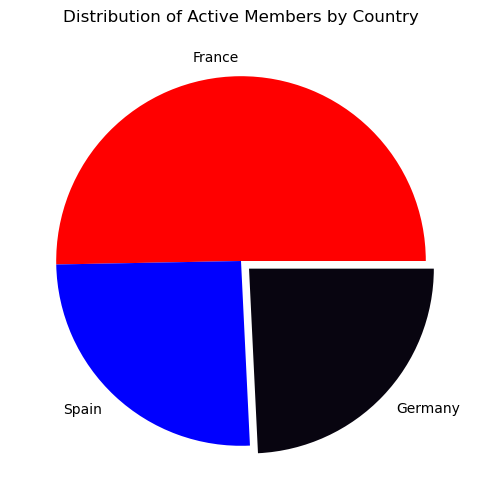

In [38]:
active_members = df[df['IsActiveMember'] == 1]
country_active_counts = active_members['Geography'].value_counts()


country_active_counts.plot(kind='pie',  colors=['r','b','#080510'], figsize=(8, 6), explode = [0,0,0.06])
plt.title('Distribution of Active Members by Country')
plt.ylabel('')  


plt.show()            #clearly we can see that spain has the least active members and this makes sense since they also the least by population

In [19]:
mean_salary = df['EstimatedSalary'].mean()
mean_salary

100090.239881

In [20]:
fra = df[df['Geography']=='France']     #we print the mean salary for those from france to compare with the total mean salary(100090)
fra['EstimatedSalary'].mean()

99899.18081372158

In [21]:
spa = df[df['Geography']=='Spain']
spa['EstimatedSalary'].mean()

99440.57228098507

In [22]:
ger = df[df['Geography']=='Germany']      #haven printed mean salary for each country, we realized that the mean salary for Germans is a lil greater than
ger['EstimatedSalary'].mean()             #the mean salary for the rest, even a lil greater than the average mean salary

101113.43510163412

In [23]:
df[df['EstimatedSalary'] < mean_salary].sum()     #we hereby find the total number  of active staff whose salary is less than 
                                                 #the mean salary = 2586

RowNumber                                                   25023039
CustomerId                                               78341702949
Surname            BoniMitchellBartlettHeHBearceAndrewsKayScottGo...
CreditScore                                                  3250429
Geography          FranceSpainFranceFranceFranceFranceSpainFrance...
Gender             FemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMa...
Age                                                           195098
Tenure                                                         24945
Balance                                                 378069292.04
NumOfProducts                                                   7606
HasCrCard                                                       3548
IsActiveMember                                                  2586
EstimatedSalary                                         251368045.26
Exited                                                           995
dtype: object

In [24]:
df[df['EstimatedSalary'] > mean_salary].sum()     #we also find the total number  of active staff whose salary is greater than 
                                                 #the mean salary = 2565
#therefore total number of staff whose salary is greater than mean and those whose salary is less than mean = 5151(total number of ACTIVE STAFF)

RowNumber                                                   24981961
CustomerId                                               78567702745
Surname            HargraveHillOnioChuObinnaChinMuldrowMcDonaldDe...
CreditScore                                                  3254859
Geography          FranceSpainFranceSpainGermanyFranceSpainFrance...
Gender             FemaleFemaleFemaleMaleFemaleFemaleMaleMaleFema...
Age                                                           194120
Tenure                                                         25183
Balance                                                 386789600.84
NumOfProducts                                                   7696
HasCrCard                                                       3507
IsActiveMember                                                  2565
EstimatedSalary                                         749534353.55
Exited                                                          1042
dtype: object

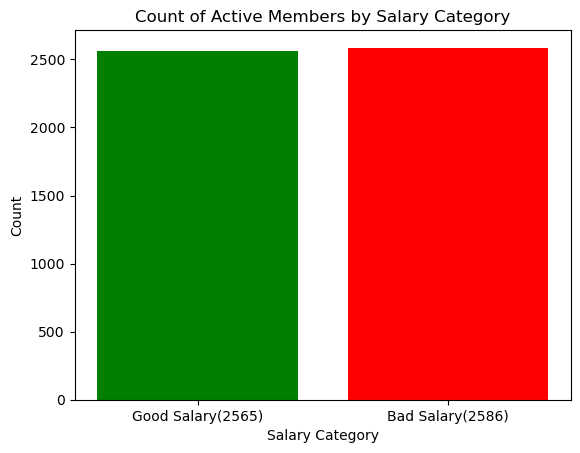

In [26]:
mem_num = df[df['IsActiveMember'] == 1]
activ_wit_gud_salary = len(mem_num[mem_num['EstimatedSalary'] > mean_salary])
activ_wit_bad_salary = len(mem_num[mem_num['EstimatedSalary'] < mean_salary])
categories = ['Good Salary(2565)', 'Bad Salary(2586)']
counts = [activ_wit_gud_salary, activ_wit_bad_salary]

plt.bar(categories, counts, color=['green', 'red'])
plt.xlabel('Salary Category')
plt.ylabel('Count')
plt.title('Count of Active Members by Salary Category')
plt.show()

In [50]:
inactiv = df[grp0]   #assigns inactive members to new dataframe
inactiv[inactiv['EstimatedSalary'] < mean_salary].count()  #this prints the number of inactive members whose salary is less than mean_salary = 2407

RowNumber          2407
CustomerId         2407
Surname            2407
CreditScore        2407
Geography          2407
Gender             2407
Age                2407
Tenure             2407
Balance            2407
NumOfProducts      2407
HasCrCard          2407
IsActiveMember     2407
EstimatedSalary    2407
Exited             2407
dtype: int64

In [51]:
inactiv[inactiv['EstimatedSalary'] > mean_salary].count()  #this prints the number of inactive members whose salary is greater than mean_salary = 2442
#therefore the sum of staff for those whose salary is greater than mean salary and those whose salary is less than mean is = 4849(total number of inactive members)

RowNumber          2442
CustomerId         2442
Surname            2442
CreditScore        2442
Geography          2442
Gender             2442
Age                2442
Tenure             2442
Balance            2442
NumOfProducts      2442
HasCrCard          2442
IsActiveMember     2442
EstimatedSalary    2442
Exited             2442
dtype: int64

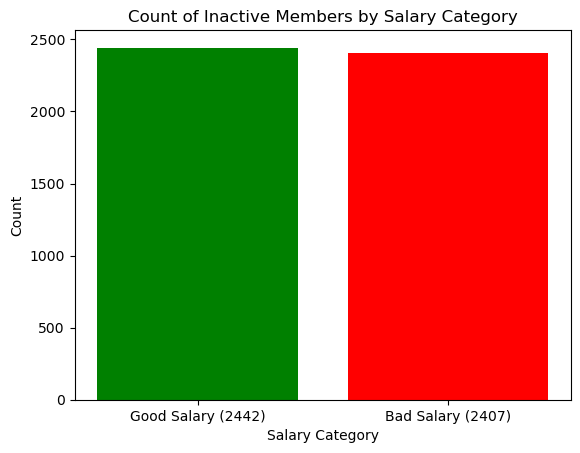

In [27]:
# Filter inactive members
num_members = df[df['IsActiveMember'] == 0] 

# Counts of inactive members with good and bad salaries
inactiv_wit_gud_salary = len(num_members[num_members['EstimatedSalary'] > mean_salary])
inactiv_wit_bad_salary = len(num_members[num_members['EstimatedSalary'] < mean_salary])

# Prepare data for plotting
categories = ['Good Salary (2442)', 'Bad Salary (2407)']
counts = [inactiv_wit_gud_salary, inactiv_wit_bad_salary]

# Plotting
plt.bar(categories, counts, color=['green', 'red'])
plt.xlabel('Salary Category')
plt.ylabel('Count')
plt.title('Count of Inactive Members by Salary Category')
plt.show()

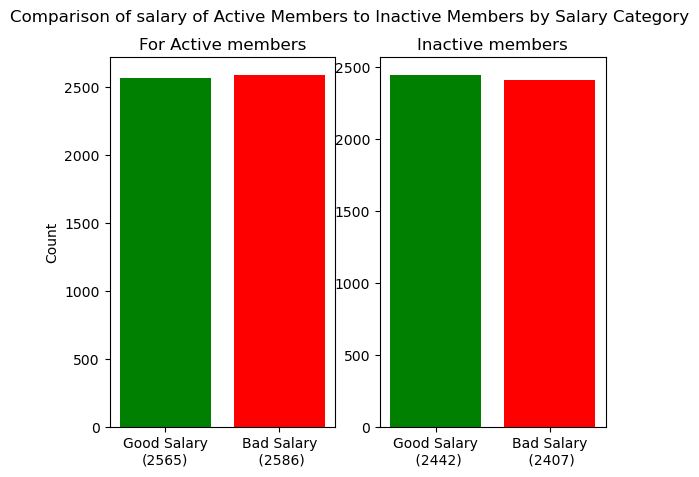

In [30]:
num_members = df[df['IsActiveMember'] == 0]          # Filter inactive member

inactiv_wit_gud_salary = len(num_members[num_members['EstimatedSalary'] > mean_salary])  # Counts of inactive members with good 
inactiv_wit_bad_salary = len(num_members[num_members['EstimatedSalary'] < mean_salary])  #and bad salaries


categories = ['Good Salary (2442)', 'Bad Salary (2407)']    # Preparing data for plotting
counts = [inactiv_wit_gud_salary, inactiv_wit_bad_salary]

###### plotting
categories = [f'Good Salary\n(2565)', f'Bad Salary\n (2586)']
counts = [activ_wit_gud_salary, activ_wit_bad_salary]

plt.subplot(1,2,1)
plt.bar(categories, counts, color=['green', 'red'])
# plt.xlabel('Salary Category')
plt.title('For Active members')
plt.ylabel('Count')

###### Plotting
categories = [f'Good Salary\n (2442)', f'Bad Salary\n (2407)']
counts = [inactiv_wit_gud_salary, inactiv_wit_bad_salary]

plt.subplot(1,2,2)
plt.bar(categories, counts, color=['green', 'red'])
# plt.xlabel('Salary Category')
# plt.ylabel('Count')
plt.title('Inactive members')
plt.suptitle("Comparison of salary of Active Members to Inactive Members by Salary Category")
                #from this chart we have realized that it was more of people who were under paid that stayed than those who were over paid 
plt.show()


In [55]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
